In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split


In [50]:
A=pd.read_csv('car-mpg.csv')

In [51]:
A.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [52]:
### car name column was dropped as it was useless for  our model

In [53]:
A.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [54]:
A.shape

(398, 9)

In [55]:
A['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [56]:
A['car_type'].value_counts()

1    211
0    187
Name: car_type, dtype: int64

In [57]:
A['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

#### HOMEWORK: out of origin, car type, cyl, which categorical attribute afftects mileage? do the suitable tests

Now, we  will learn how to create dummy columns which is also called one hot encoding in dl.
Replace the numbers in categorical variables with actual country names

In [58]:
A['origin']= A["origin"].replace({1: 'American', 2: 'European', 3:'Asian'})

In [59]:
A.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,American,0
1,15.0,8,350.0,165,3693,11.5,70,American,0
2,18.0,8,318.0,150,3436,11.0,70,American,0
3,16.0,8,304.0,150,3433,12.0,70,American,0
4,17.0,8,302.0,140,3449,10.5,70,American,0


In [60]:
A['origin'].value_counts()

American    249
Asian        79
European     70
Name: origin, dtype: int64

In [61]:
#convert categorical variable into dummy variables
A= pd.get_dummies(A, columns=['origin'])

In [62]:
A.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_American,origin_Asian,origin_European
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [63]:
A.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_American,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_Asian,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_European,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [64]:
A["hp"]

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      ?
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

There is unsual data that is why python is not showing hp in describe

In [65]:
#check if hp column contains anything other than digit. is digit is only for str attributes


temp= pd.DataFrame(A.hp.str.isdigit())
temp[temp["hp"]==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [66]:
#replace these missing values with nan and then remove them

A= A.replace("?", np.nan)

In [67]:
A= A.fillna(A.median())

In [70]:
A.describe()

,mpg,cyl,disp,wt,acc,yr,car_type,origin_American,origin_Asian,origin_European
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.530151,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.499718,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
A['hp']=A['hp'].astype('float64')
A.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_American,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_Asian,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


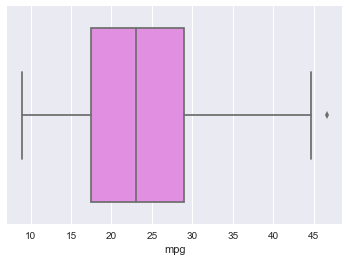

In [76]:
sns.boxplot(A.mpg,color='violet', orient="h")

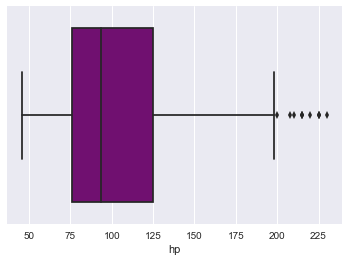

In [79]:
sns.boxplot(A.hp,color='purple', orient="h")

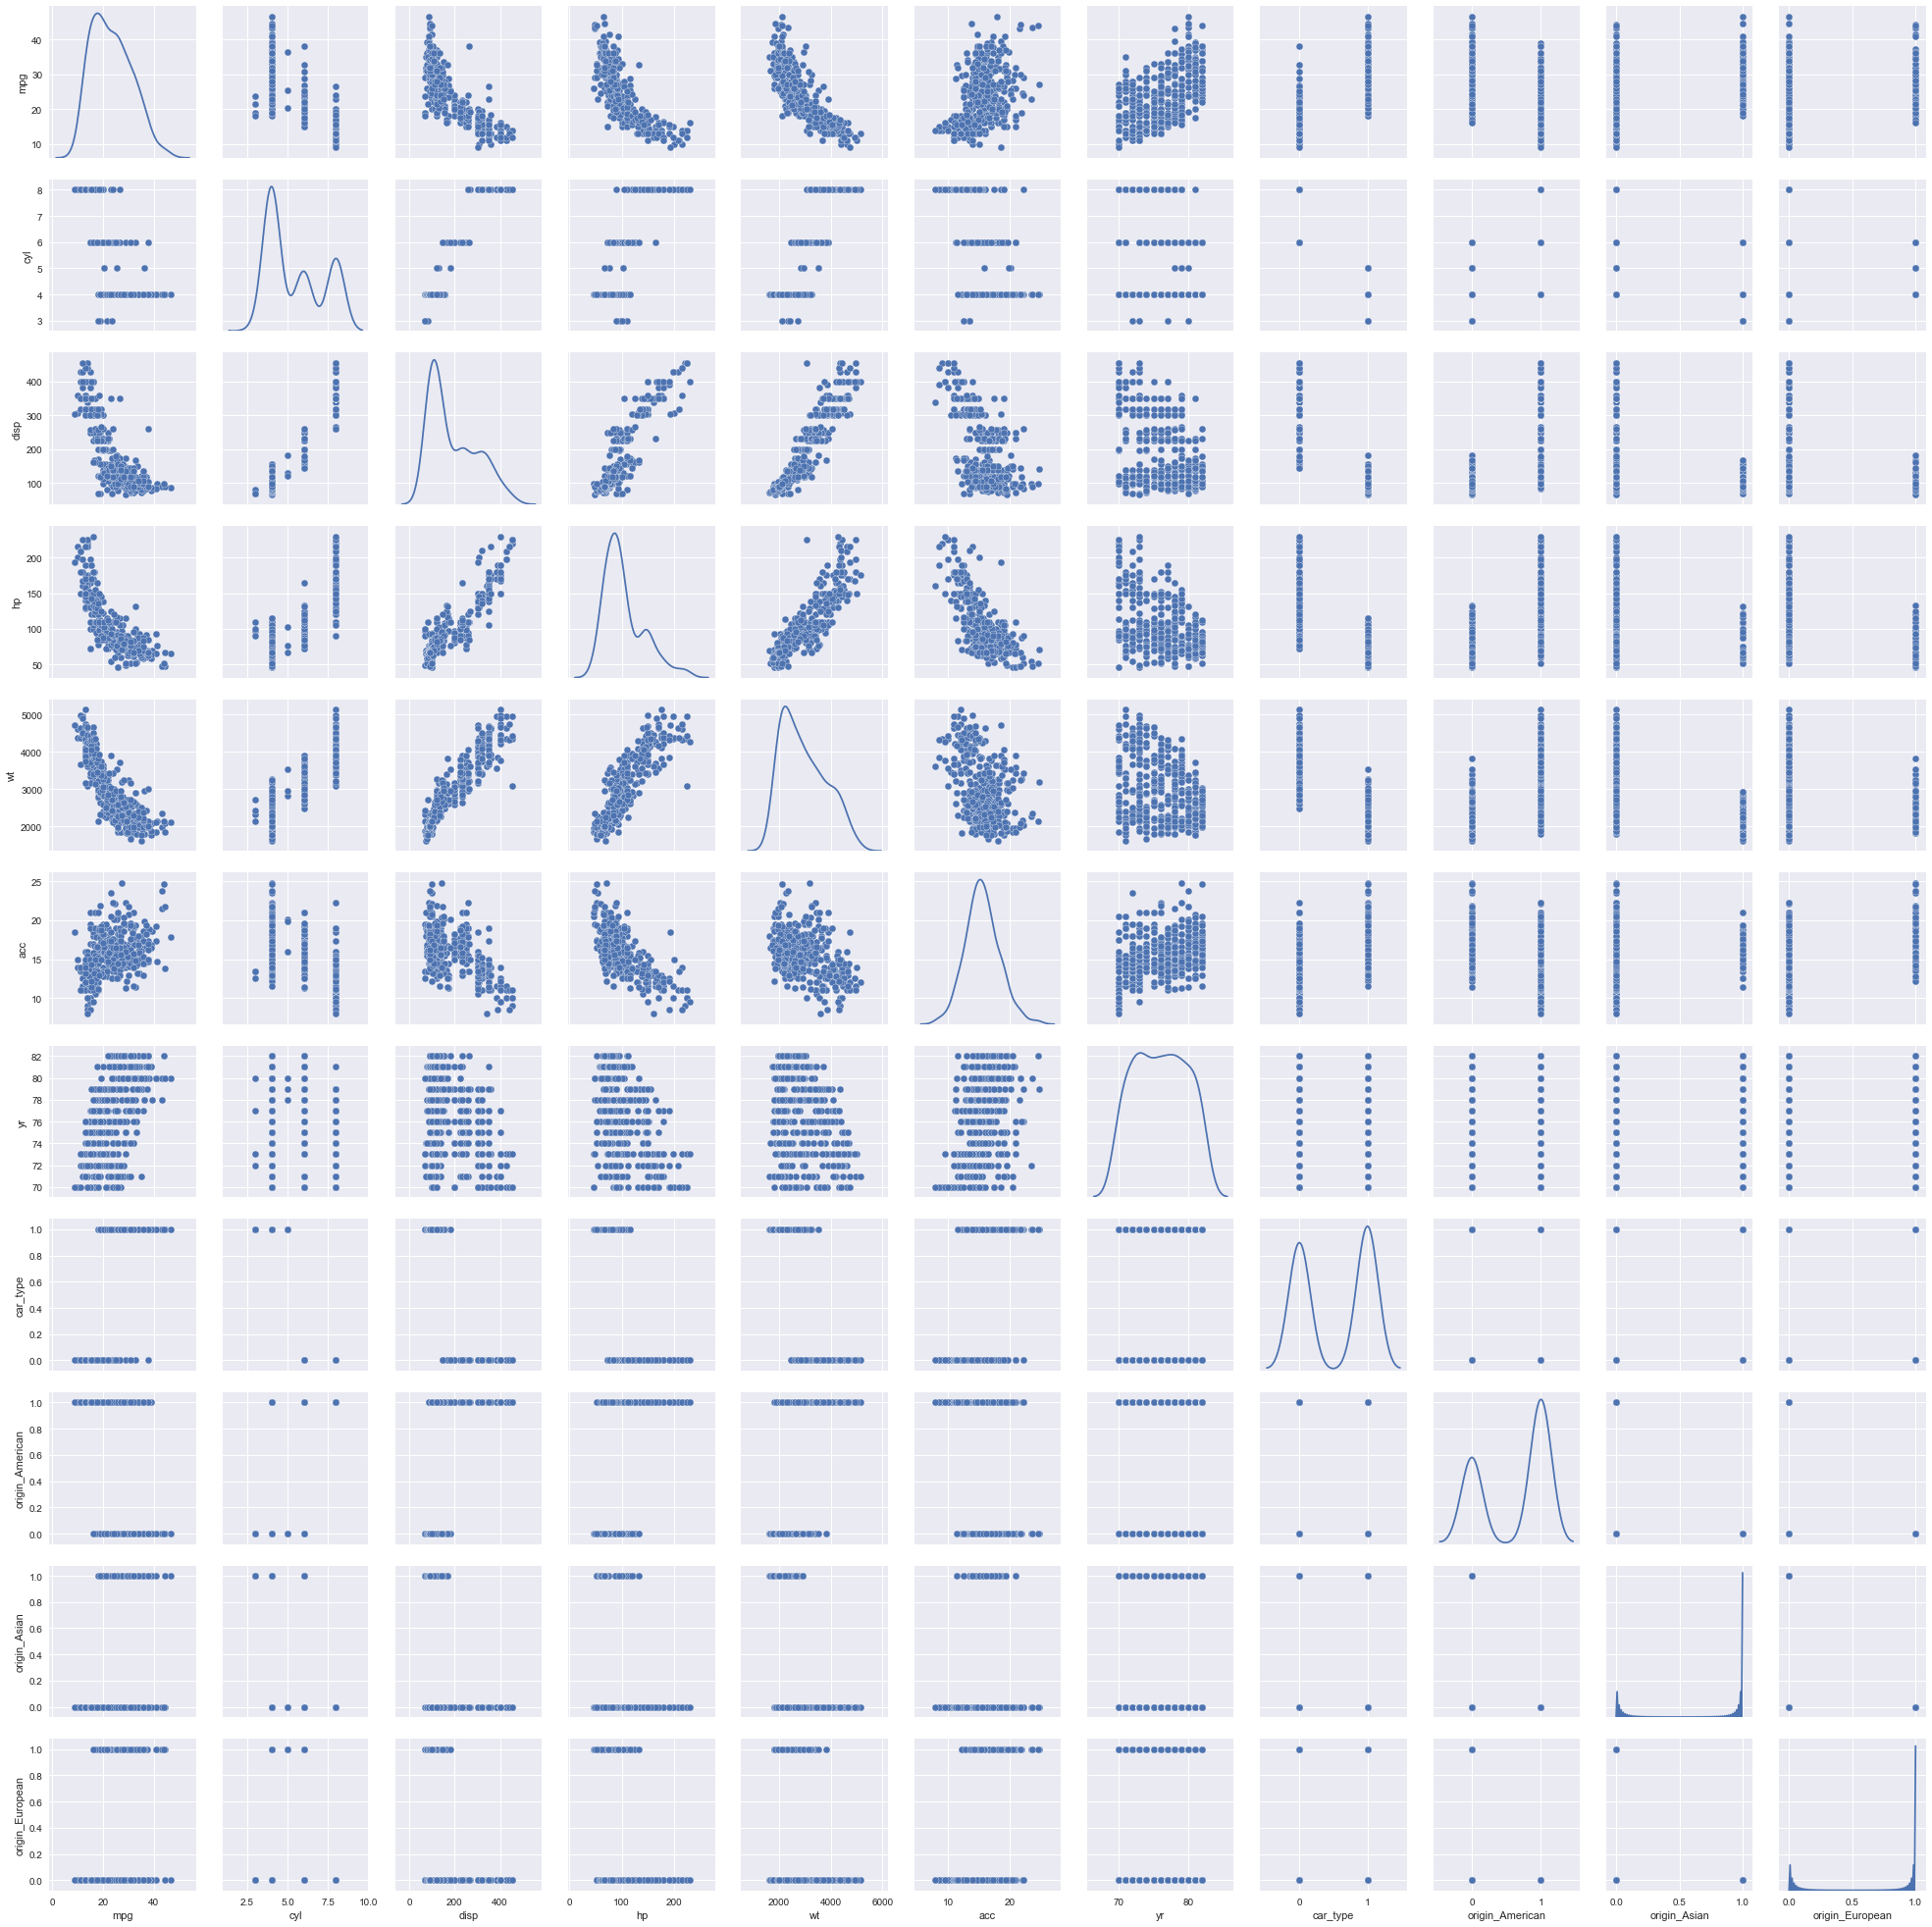

In [81]:
sns.pairplot(A,diag_kind='kde')

In [82]:
#copy all predictive variables into x dataframe. Since mpg is dependent variable we drop it

x=A.drop(['mpg', 'cyl'], axis=1)
#copy the mpg column alone into y df
y=A[['mpg']]

In [84]:
x.shape

(398, 9)

In [85]:
y.shape

(398, 1)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [87]:
x_train.shape

(278, 9)

In [88]:
x_test.shape

(120, 9)

In [89]:
y_train.shape

(278, 1)

In [90]:
y_test.shape

(120, 1)

In [91]:
regression_model= LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
ypredict=regression_model.predict(x_test)


In [96]:
rmse= np.sqrt(np.sum((ypredict-y_test)**2/len(y_test)))


In [97]:
rmse # this is doing the validation of our model

mpg    2.935239
dtype: float64

In [98]:
regression_model.score(x_train,y_train) # always checks the model we created.

0.829337716273302